In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("stock.txt")
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2188,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2189,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2190,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2191,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400


In [3]:
test=pd.read_csv("stock_test.txt")
test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
5,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
6,2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520
7,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
8,2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
9,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331


In [4]:
test.shape,train.shape

((35, 7), (2193, 7))

In [5]:
test.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       35 non-null     object 
 1   Open       35 non-null     float64
 2   High       35 non-null     float64
 3   Low        35 non-null     float64
 4   Close      35 non-null     float64
 5   Adj Close  35 non-null     float64
 6   Volume     35 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.0+ KB


<AxesSubplot:>

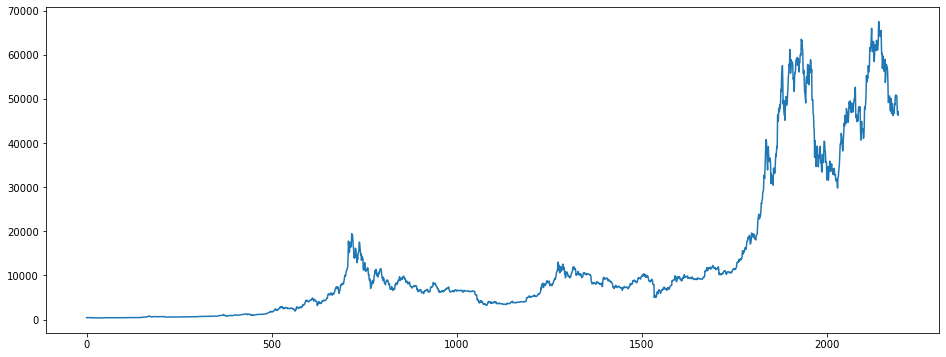

In [9]:
train["Open"].plot(figsize=(16,6))

In [12]:
df=train.reset_index()['Close']


In [13]:
df

0         434.334015
1         433.437988
2         430.010986
3         433.091003
4         431.959991
            ...     
2188    47588.855469
2189    46444.710938
2190    47178.125000
2191    46306.445313
2192    47686.812500
Name: Close, Length: 2193, dtype: float64

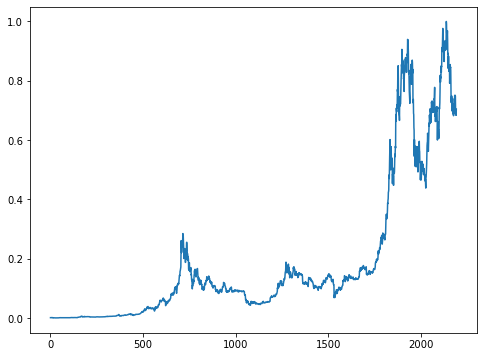

In [83]:
plt.figure(figsize=(8,6))
plt.plot(df)

In [15]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))

In [17]:
df=mms.fit_transform(np.array(df).reshape(-1,1))

In [18]:
print(df)

[[0.00104167]
 [0.00102834]
 [0.00097734]
 ...
 [0.69660795]
 [0.68363701]
 [0.70417743]]


In [19]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data=df[0:training_size,:]
test_data=df[training_size:len(df),:1]

In [22]:
training_size,test_size

(1425, 768)

In [23]:
train_data

array([[0.00104167],
       [0.00102834],
       [0.00097734],
       ...,
       [0.10466078],
       [0.09945443],
       [0.10091593]])

In [24]:
test_data

array([[0.10199085],
       [0.10665277],
       [0.10563261],
       [0.11006901],
       [0.10721773],
       [0.10505505],
       [0.10353272],
       [0.1035053 ],
       [0.10249178],
       [0.1054124 ],
       [0.10688093],
       [0.10701845],
       [0.10713909],
       [0.10470695],
       [0.10287994],
       [0.10197681],
       [0.10235934],
       [0.10275442],
       [0.1005966 ],
       [0.10100772],
       [0.09773669],
       [0.09339213],
       [0.10286034],
       [0.10175981],
       [0.10199748],
       [0.10158592],
       [0.10635405],
       [0.1040333 ],
       [0.10354081],
       [0.10283583],
       [0.10229733],
       [0.10305804],
       [0.10347323],
       [0.10503065],
       [0.10310129],
       [0.10162224],
       [0.10172008],
       [0.0985252 ],
       [0.10387342],
       [0.10485214],
       [0.10486197],
       [0.11018769],
       [0.11605761],
       [0.11481019],
       [0.11182234],
       [0.1161002 ],
       [0.11418038],
       [0.116

In [32]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY=[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), np.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [35]:
print(x_train.shape), print(y_train.shape)

(1324, 100)
(1324,)


(None, None)

In [36]:
print(x_test.shape), print(y_test.shape)

(667, 100)
(667,)


(None, None)

In [37]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [40]:
import tensorflow

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
seq=Sequential()
seq.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
seq.add(LSTM(50,return_sequences=True))
seq.add(LSTM(50))
seq.add(Dense(1))
seq.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
seq.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
21/21 [==============================] - 7s 174ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 2/100
21/21 [==============================] - 3s 129ms/step - loss: 3.3806e-04 - val_loss: 0.0072
Epoch 3/100
21/21 [==============================] - 3s 128ms/step - loss: 2.4852e-04 - val_loss: 0.0073
Epoch 4/100
21/21 [==============================] - 3s 123ms/step - loss: 2.2883e-04 - val_loss: 0.0104
Epoch 5/100
21/21 [==============================] - 3s 121ms/step - loss: 2.0181e-04 - val_loss: 0.0110
Epoch 6/100
21/21 [==============================] - 3s 122ms/step - loss: 1.8981e-04 - val_loss: 0.0155
Epoch 7/100
21/21 [==============================] - 3s 121ms/step - loss: 1.6257e-04 - val_loss: 0.0143
Epoch 8/100
21/21 [==============================] - 3s 123ms/step - loss: 1.5079e-04 - val_loss: 0.0205
Epoch 9/100
21/21 [==============================] - 3s 121ms/step - loss: 1.4883e-04 - val_loss: 0.0184
Epoch 10/100
21/21 [==============================] - 3s 12

21/21 [==============================] - 3s 119ms/step - loss: 4.4400e-05 - val_loss: 0.0031
Epoch 79/100
21/21 [==============================] - 3s 120ms/step - loss: 5.0511e-05 - val_loss: 0.0058
Epoch 80/100
21/21 [==============================] - 3s 120ms/step - loss: 4.2369e-05 - val_loss: 0.0035
Epoch 81/100
21/21 [==============================] - 2s 120ms/step - loss: 3.8305e-05 - val_loss: 0.0050
Epoch 82/100
21/21 [==============================] - 3s 121ms/step - loss: 3.6314e-05 - val_loss: 0.0042
Epoch 83/100
21/21 [==============================] - 3s 122ms/step - loss: 3.6708e-05 - val_loss: 0.0053
Epoch 84/100
21/21 [==============================] - 3s 120ms/step - loss: 4.8695e-05 - val_loss: 0.0040
Epoch 85/100
21/21 [==============================] - 2s 119ms/step - loss: 3.5477e-05 - val_loss: 0.0065
Epoch 86/100
21/21 [==============================] - 2s 119ms/step - loss: 3.6925e-05 - val_loss: 0.0046
Epoch 87/100
21/21 [==============================] - 3s 11

In [50]:
import tensorflow as tf


In [51]:
tf.__version__


'2.8.0'

In [53]:
train_predict=seq.predict(x_train)
test_predict=seq.predict(x_test)

In [55]:
##Transformback to original form
train_predict=mms.inverse_transform(train_predict)
test_predict=mms.inverse_transform(test_predict)

In [57]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6593.043203376651

In [58]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

33983.75089713372

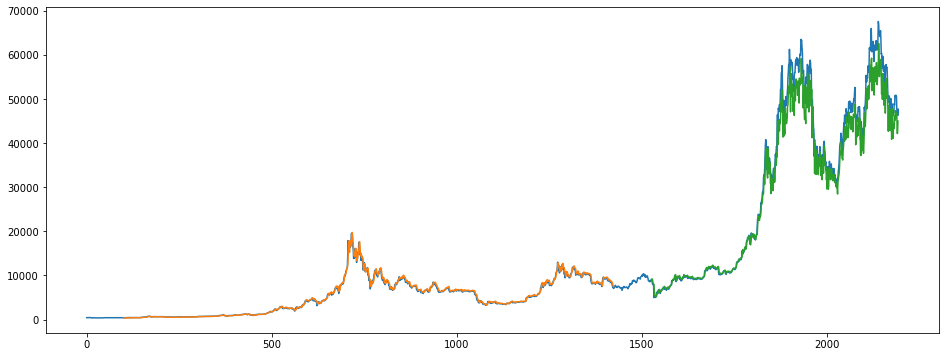

In [84]:
plt.figure(figsize=(16,6))
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
plt.plot(mms.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [62]:
len(test_data)

768

In [64]:
x_input=test_data[668:].reshape(1,-1)
x_input.shape

(1, 100)

In [65]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
temp_input


[0.6320512007641813,
 0.6302185865718853,
 0.6375389293270218,
 0.6230631488794044,
 0.6051889990891297,
 0.6130729369577955,
 0.646204611301083,
 0.7105779167538119,
 0.7045446123036865,
 0.7118131642898995,
 0.7253982133278892,
 0.761139595844046,
 0.8183790866847156,
 0.7952331485067357,
 0.7976417387810595,
 0.8125277183608054,
 0.8096015691938083,
 0.8499752316889838,
 0.8284919456410609,
 0.8487298701239685,
 0.8475457739758019,
 0.9111211761319394,
 0.9006785652028838,
 0.9105210194008378,
 0.9175514268584509,
 0.9508227212069549,
 0.9765783675578042,
 0.92029081539101,
 0.8977037640937777,
 0.9081401554920443,
 0.9012537856433482,
 0.9326363736577323,
 0.8928159597706781,
 0.8648198832806554,
 0.8966602179609117,
 0.9205555818767749,
 0.915509150159529,
 0.9070291825343808,
 0.9023485412720951,
 0.9354127306826253,
 0.9315980589078506,
 0.9090123445252248,
 0.9041530803320589,
 0.9101320945823292,
 0.936909489602222,
 1.0,
 0.991146162339174,
 0.9617335997055719,
 0.96105997100

In [69]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = seq.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = seq.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.65331304]
101
1 day input [0.63021859 0.63753893 0.62306315 0.605189   0.61307294 0.64620461
 0.71057792 0.70454461 0.71181316 0.72539821 0.7611396  0.81837909
 0.79523315 0.79764174 0.81252772 0.80960157 0.84997523 0.82849195
 0.84872987 0.84754577 0.91112118 0.90067857 0.91052102 0.91755143
 0.95082272 0.97657837 0.92029082 0.89770376 0.90814016 0.90125379
 0.93263637 0.89281596 0.86481988 0.89666022 0.92055558 0.91550915
 0.90702918 0.90234854 0.93541273 0.93159806 0.90901234 0.90415308
 0.91013209 0.93690949 1.         0.99114616 0.9617336  0.96105997
 0.94924464 0.95391093 0.96875134 0.94034512 0.88980198 0.89287874
 0.84190035 0.85942115 0.88289672 0.86851156 0.83218571 0.85122943
 0.83205382 0.84684872 0.79171812 0.81024887 0.84645852 0.85476341
 0.84284211 0.84618131 0.83499108 0.79214192 0.72670472 0.72920678
 0.74726827 0.74901614 0.74611016 0.70395881 0.69757785 0.72911244
 0.74006186 0.69005099 0.6881932  0.72218137 0.70385918 0.68208497
 0.69170713 0.68959766 0.69217586

10 day output [[0.40581894]]
11 day input [0.7611396  0.81837909 0.79523315 0.79764174 0.81252772 0.80960157
 0.84997523 0.82849195 0.84872987 0.84754577 0.91112118 0.90067857
 0.91052102 0.91755143 0.95082272 0.97657837 0.92029082 0.89770376
 0.90814016 0.90125379 0.93263637 0.89281596 0.86481988 0.89666022
 0.92055558 0.91550915 0.90702918 0.90234854 0.93541273 0.93159806
 0.90901234 0.90415308 0.91013209 0.93690949 1.         0.99114616
 0.9617336  0.96105997 0.94924464 0.95391093 0.96875134 0.94034512
 0.88980198 0.89287874 0.84190035 0.85942115 0.88289672 0.86851156
 0.83218571 0.85122943 0.83205382 0.84684872 0.79171812 0.81024887
 0.84645852 0.85476341 0.84284211 0.84618131 0.83499108 0.79214192
 0.72670472 0.72920678 0.74726827 0.74901614 0.74611016 0.70395881
 0.69757785 0.72911244 0.74006186 0.69005099 0.6881932  0.72218137
 0.70385918 0.68208497 0.69170713 0.68959766 0.69217586 0.72277496
 0.71819029 0.75027284 0.75083318 0.74499506 0.7506445  0.74812826
 0.70271979 0.685694

22 day output [[0.3408546]]
23 day input [0.91052102 0.91755143 0.95082272 0.97657837 0.92029082 0.89770376
 0.90814016 0.90125379 0.93263637 0.89281596 0.86481988 0.89666022
 0.92055558 0.91550915 0.90702918 0.90234854 0.93541273 0.93159806
 0.90901234 0.90415308 0.91013209 0.93690949 1.         0.99114616
 0.9617336  0.96105997 0.94924464 0.95391093 0.96875134 0.94034512
 0.88980198 0.89287874 0.84190035 0.85942115 0.88289672 0.86851156
 0.83218571 0.85122943 0.83205382 0.84684872 0.79171812 0.81024887
 0.84645852 0.85476341 0.84284211 0.84618131 0.83499108 0.79214192
 0.72670472 0.72920678 0.74726827 0.74901614 0.74611016 0.70395881
 0.69757785 0.72911244 0.74006186 0.69005099 0.6881932  0.72218137
 0.70385918 0.68208497 0.69170713 0.68959766 0.69217586 0.72277496
 0.71819029 0.75027284 0.75083318 0.74499506 0.7506445  0.74812826
 0.70271979 0.68569446 0.69660795 0.68363701 0.70417743 0.65331304
 0.58807081 0.51619142 0.4701083  0.45086056 0.44444805 0.43931556
 0.43157539 0.4221599

In [70]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [71]:
len(df)

2193

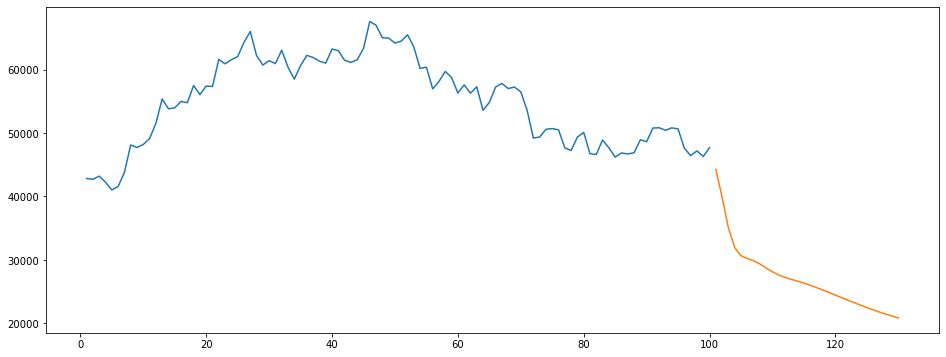

In [85]:
plt.figure(figsize=(16,6))
plt.plot(day_new,mms.inverse_transform(df[2093:]))
plt.plot(day_pred,mms.inverse_transform(lst_output))

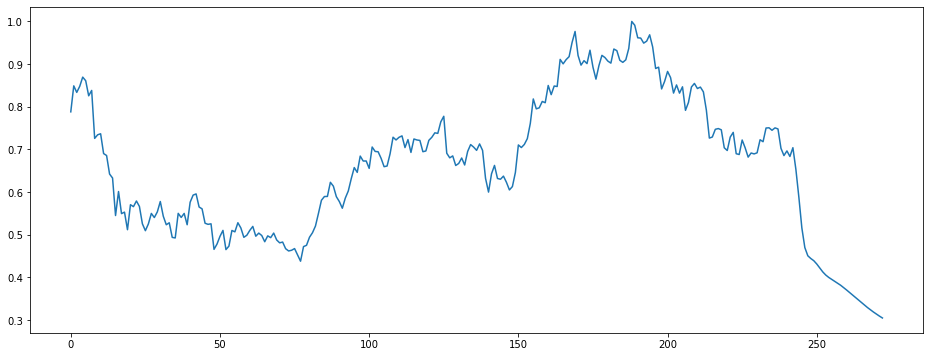

In [86]:
df1=df.tolist()
df1.extend(lst_output)
plt.figure(figsize=(16,6))
plt.plot(df1[1950:])

In [78]:
df1=mms.inverse_transform(df1).tolist()


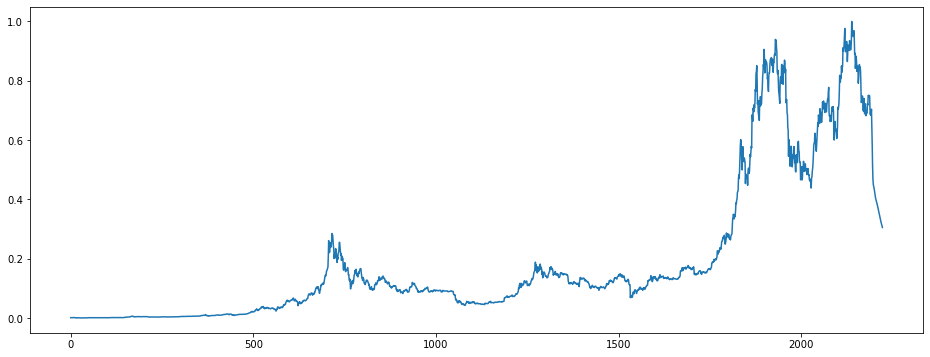

In [87]:
plt.figure(figsize=(16,6))
plt.plot(df1)
